In [1]:
from langchain_community.tools import ArxivQueryRun, WikipediaQueryRun
from langchain_community.utilities import ArxivAPIWrapper, WikipediaAPIWrapper

import os
from dotenv import load_dotenv


load_dotenv()

True

In [2]:
wiki_wrapper = WikipediaAPIWrapper(top_k_results=2, doc_content_chars_max=500)
wiki = WikipediaQueryRun(api_wrapper=wiki_wrapper)
wiki

WikipediaQueryRun(api_wrapper=WikipediaAPIWrapper(wiki_client=<module 'wikipedia' from 'd:\\LIFE\\_BOOTCAMP_MANDIRI\\B11_LANGGRAPH\\.venv\\Lib\\site-packages\\wikipedia\\__init__.py'>, top_k_results=2, lang='en', load_all_available_meta=False, doc_content_chars_max=500))

In [5]:
response = wiki.invoke("Apa itu attention is all you need")
print(response)

Page: August 2025 Indonesian protests
Summary: On 25 August until early September 2025, several protests took place in Indonesia as part of a larger civil unrest that began in early 2025 over economic frustrations and a proposed hike in housing subsidies for members of parliament. Protesters initially demanded the House of Representatives reverse its subsidy schemes and penalize its members who made insensitive statements, as well as pass the Confiscation of Assets Act for lawmakers convicted of


In [6]:
arxiv_wrapper = ArxivAPIWrapper(top_k_results=2, doc_content_chars_max=500)
arxiv = ArxivQueryRun(api_wrapper=arxiv_wrapper)
arxiv

ArxivQueryRun(api_wrapper=ArxivAPIWrapper(arxiv_search=<class 'arxiv.Search'>, arxiv_exceptions=(<class 'arxiv.ArxivError'>, <class 'arxiv.UnexpectedEmptyPageError'>, <class 'arxiv.HTTPError'>), top_k_results=2, ARXIV_MAX_QUERY_LENGTH=300, continue_on_failure=False, load_max_docs=100, load_all_available_meta=False, doc_content_chars_max=500))

In [7]:
response = arxiv.invoke("Machine learning")

In [8]:
print(response)

Published: 2023-06-07
Title: Changing Data Sources in the Age of Machine Learning for Official Statistics
Authors: Cedric De Boom, Michael Reusens
Summary: Data science has become increasingly essential for the production of official statistics, as it enables the automated collection, processing, and analysis of large amounts of data. With such data science practices in place, it enables more timely, more insightful and more flexible reporting. However, the quality and integrity of data-science-


In [9]:
os.environ["TAVILY_API_KEY"] = os.getenv("TAVILY_API_KEY")
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")


In [10]:
from langchain_community.tools.tavily_search import TavilySearchResults

# Tavily search Tool
tavily_tool = TavilySearchResults()

C:\Users\Farhan Kamil\AppData\Local\Temp\ipykernel_4540\1522468895.py:4: LangChainDeprecationWarning: The class `TavilySearchResults` was deprecated in LangChain 0.3.25 and will be removed in 1.0. An updated version of the class exists in the `langchain-tavily package and should be used instead. To use it run `pip install -U `langchain-tavily` and import as `from `langchain_tavily import TavilySearch``.
  tavily_tool = TavilySearchResults()


In [14]:
response = tavily_tool.invoke("Berikan Bootcamp terbaru tentang ai engineer gratis")
print(response)

[{'title': 'The AI Engineering Bootcamp by "Dr. Greg" Loughnane ...', 'url': 'https://maven.com/aimakerspace/ai-eng-bootcamp', 'content': 'The AI Engineering Bootcamp\n\nFree resources\n\nAll coursesEngineering\n\n# The AI Engineering Bootcamp\n\n4.8 (110)\n\n## "Dr. Greg" Loughnane\n\nCo-Founder & CEO @ AI Makerspace (AIM)\n\n## Chris "The Wiz 🪄" Alexiuk\n\nDL @ NVIDIA | Co-Founder & CTO @ AIM\n\nThis course is popular.\n\n8people enrolled last week.\n\n#### This course is popular\n\n8people enrolled last week.\n\n4.8 (110)\n\nGet course updates\n\nGet reimbursedBulk purchases\n\nCovered by the Maven Guarantee\n\n## The bootcamp for professionals, NOT beginners.\n\nWelcome to the longest-running AI engineeringbootcamp on Mavenas we enter our 3rd year with Cohort 9 🚀\n\nOurcurriculum always adapts to the market.\n\nOur certified grads rule. Ask them about their journeys.\n\nWe teach live every week on YouTube.\n\nWe\'re all in on OSS; check our GitHub.\n\n-- [...] We work with a small 

In [15]:
# Menyatukan Tools yang ada
tools = [arxiv, wiki, tavily_tool]

In [18]:
from langchain_groq import ChatGroq

model = ChatGroq(model_name="openai/gpt-oss-120b",  streaming=True)
llm_with_tools = model.bind_tools(tools)

In [20]:
from pprint import pprint
from langchain_core.messages import HumanMessage, AIMessage

response = llm_with_tools.invoke([HumanMessage(content=f"Carikan aku bootcamp ai engineer yang gratis dan buku yang murah")])

In [21]:
response.tool_calls

[{'name': 'tavily_search_results_json',
  'args': {'query': 'free AI engineer bootcamp'},
  'id': 'fc_944a3d02-2bd6-486d-9d8b-56d921150140',
  'type': 'tool_call'}]

In [26]:
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage
from typing import Annotated
from langgraph.graph.message import add_messages

class State(TypedDict):
    messages : Annotated[list[AnyMessage], add_messages]

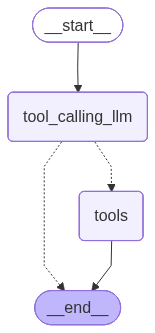

In [30]:
from IPython.display import display, Image
from langgraph.graph import START, END, StateGraph
from langgraph.prebuilt import ToolNode, tools_condition

# node definisi
def tool_calling_llm(state:State) -> State:
    return {"messages" : [llm_with_tools.invoke(state["messages"])]}

builder = StateGraph(State)
builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_node("tools", ToolNode(tools))

builder.add_edge(START, "tool_calling_llm")
builder.add_conditional_edges(
    "tool_calling_llm", tools_condition
)
builder.add_edge("tools", END)

builder_graph = builder.compile()
display(Image(builder_graph.get_graph().draw_mermaid_png()))


In [39]:
response = builder_graph.invoke({"messages" : HumanMessage(content=f"Apa itu attention is all you need ?")})

for msg in response["messages"]:
    msg.pretty_print()

================================ Human Message =================================

Apa itu attention is all you need ?
================================== Ai Message ==================================
Tool Calls:
  arxiv (fc_e1c5cead-b2d1-42de-bf1a-20fbecabee68)
 Call ID: fc_e1c5cead-b2d1-42de-bf1a-20fbecabee68
  Args:
    query: Attention Is All You Need arxiv
================================= Tool Message =================================
Name: arxiv

Published: 2013-04-11
Title: A Simulation and Modeling of Access Points with Definition Language
Authors: Tairen Sun
Summary: This submission has been withdrawn by arXiv administrators because it contains fictitious content and was submitted under a pseudonym, which is against arXiv policy.

Published: 2011-09-26
Title: Superconductivity as a consequence of an ordering of the electron gas zero-point oscillations
Authors: Boris V. Vasiliev
Summary: This paper has been administratively withdrawn b


In [40]:
response = builder_graph.invoke({"messages" : HumanMessage(content=f"berikan berata terbaru tentang ai saat ini")})

for msg in response["messages"]:
    msg.pretty_print()

================================ Human Message =================================

berikan berata terbaru tentang ai saat ini
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (fc_0fad4a69-ba52-4ba3-bacb-76ff51f9fc73)
 Call ID: fc_0fad4a69-ba52-4ba3-bacb-76ff51f9fc73
  Args:
    query: latest AI news 2024
================================= Tool Message =================================
Name: tavily_search_results_json

[{"title": "Your AI Update - January 2024 | News", "url": "https://altech.nd.edu/events-news/news/your-ai-update-january-2024/", "content": "a market-challenging AI chatbot developed by Microsoft that is intended to be integrated into the Microsoft 365 suite of products. Initially launched last February as ‘Bing Chat,’ the product has undergone many changes on its way to being Microsoft’s flagship AI product. Similarly, Google is integrating its Quantum technologies into its Chrome browser and ad servi

In [41]:
response = builder_graph.invoke({"messages" : HumanMessage(content=f"Apa itu machine learning?")})

for msg in response["messages"]:
    msg.pretty_print()

================================ Human Message =================================

Apa itu machine learning?
================================== Ai Message ==================================

**Machine Learning (Pembelajaran Mesin)** adalah cabang kecerdasan buatan (Artificial Intelligence/AI) yang fokus pada pengembangan algoritma dan model statistik yang memungkinkan komputer **belajar dari data** tanpa diprogram secara eksplisit untuk setiap tugas. Dengan kata lain, alih‑alih menuliskan aturan‑aturan tetap, kita melatih sistem menggunakan contoh‑contoh (data) sehingga ia dapat mengenali pola, membuat prediksi, atau mengambil keputusan pada data baru yang belum pernah dilihat sebelumnya.

---

## 1. Bagaimana Cara Kerjanya?
1. **Kumpulan Data (Dataset)** – Data berisi contoh‑contoh input (fitur) beserta label/target (jika tersedia).  
2. **Pemilihan Model** – Algoritma (misalnya regresi linear, pohon keputusan, jaringan saraf) dipilih sesuai jenis masalah.  
3. **Pelatihan (Training)**